'Interpreting carbon-isotope excursions: carbonates and organic matter' by Lee R. Kump and Michael A. Arthur (1999) in _Chemical Geology_. 

This paper starts with a simple mass-balance model for the Earth's carbon cycle, with fluxes and isotopic compositions that establish a representative Phanerozoic steady-state ocean-atmosphere reservoir.  It then explores a series of perturbations (each lasting 500ky--much longer than the residence time of carbon or phosphorous in the ocean-atmosphere reservoir) to determine the resulting signal that would be recorded in the isotopic compositions of inorganic marine carbonates and organic carbon.  Keys to the utility of the model in Kump (1999) are (1) the simple mass-balance approach and (2) incorporation of photosynthetic sensitivity to pCO$_2$, linking the dual carbon isotope record to past climate via changes to organic carbon burial rate.

Here, I set out to reproduce the equations and figures in Kump (1999) to understand the carbon cycle model presented, the mathematical basis for how carbon isotope anomalies are modeled, and more broadly the utilities and limitations of using the marine carbonate record to interpret past climate.

***

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #differential equation solver
%matplotlib inline

Figure 2 is just a visual for the dependence of the isotopic difference between carbonate and organic carbon on ambient pCO$_2$ based on Kump's equation 10.  

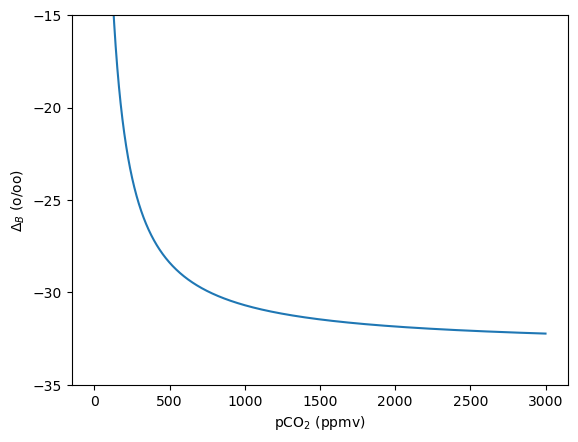

In [29]:
# [PO$_4$] is fixed at 0.25 $\mu$mol/kg, taken as a typical value for an oligotrophic surface-ocean.
PO4 = 0.25

#range of possible atmospheric pCO$_2$ values in ppmv, assumed to be the same as [CO$_2$] in the surface ocean
pCO2 = np.arange(1,3001,1)

#$\delta_B$ is the isotopic difference between carbonate and organic carbon
#Eqn 10:
delB = ((159.5*PO4+38.39)/(0.034*pCO2))-33

fig, ax = plt.subplots()
ax.plot(pCO2,delB)
ax.set_ylim([-35, -15])
ax.xaxis.set_label_text('pCO$_2$ (ppmv)')
ax.yaxis.set_label_text('$\Delta_B$ (o/oo)')
ax.yaxis.set_ticks(np.arange(-35,-10,5))
plt.show()


Figure 3 starts to examine the effects of perturbations to model inputs on atmospheric pCO$_2$, organic burial relative to steady state, and the inorganic and organic carbon isotopic compositions of marine sediments.  To begin by calculating marine carbonate isotopic composition, I think I need to solve the differential equation in Kump's equation 3 with a numerical approximation and some initial conditions to produce a steady state through time. 

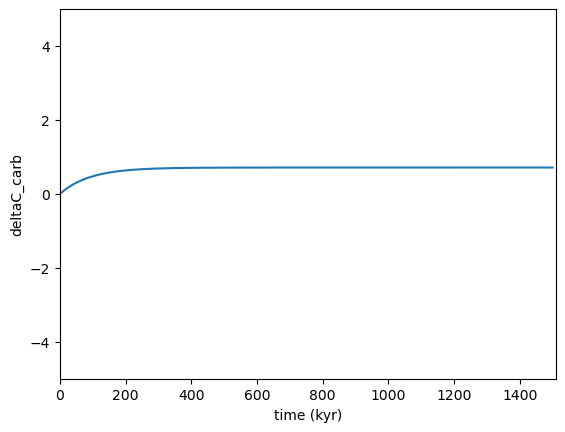

In [60]:
#define variables
F_w = 6000 + 6000 + 40000; #weathering + volcanic flux of C in 10^12 mol/kyr
F_b_org = 10000; #organic burial flux in 10^12 mol/kyr
F_b_carb = 40000; #carbonate burial flux in 10^12 mol/kyr
deltaC_w = -5; #isotopic composition of weathering + volcanic flux
deltaC_org = -29; #isotopic composition of organic burial flux
ocean_M = 3.8*10**6; #size of the ocean reservoir in 10^12 mol

#define differential equation
def model(deltaC_carb,t):
    ddeltaC_carbdt = (F_w * (deltaC_w - deltaC_carb) - F_b_org * (deltaC_org - deltaC_carb)) / ocean_M
    return ddeltaC_carbdt

# set an initial condition
deltaC_carb_0 = 0

#specify the time over which to solve the differential equation, in kyr
t = np.arange(0,1510,10) 

# solve
deltaC_carb = odeint(model,deltaC_carb_0,t)

#plot marine carbonate isotopic composition as a function of time (fig 3b)

fig, ax = plt.subplots()
ax.plot(t,deltaC_carb)
ax.xaxis.set_label_text('time (kyr)')
ax.yaxis.set_label_text('deltaC_carb')
ax.set_ylim([-5, 5])
ax.set_xlim([0, 1510])

plt.show()


Now introduce 3 different time steps: spin up to steady state, duration of perturbation, after perturbation.

In [ ]:
#define variables
F_w = 6000 + 6000 + 40000; #weathering + volcanic flux of C in 10^12 mol/kyr
F_b_org = 10000; #organic burial flux in 10^12 mol/kyr
F_b_carb = 40000; #carbonate burial flux in 10^12 mol/kyr
deltaC_w = -5; #isotopic composition of weathering + volcanic flux
deltaC_org = -29; #isotopic composition of organic burial flux
ocean_M = 3.8*10**6; #size of the ocean reservoir in 10^12 mol

#define differential equation
def model(deltaC_carb,t):
    ddeltaC_carbdt = (F_w * (deltaC_w - deltaC_carb) - F_b_org * (deltaC_org - deltaC_carb)) / ocean_M
    return ddeltaC_carbdt

# set an initial condition
deltaC_carb_0 = 1

#specify the time over which to solve the differential equation, in kyr
t = np.arange(-500,1510,10) 

# solve
deltaC_carb = odeint(model,deltaC_carb_0,t)

#plot marine carbonate isotopic composition as a function of time (fig 3b)

fig, ax = plt.subplots()
ax.plot(t,deltaC_carb)
ax.xaxis.set_label_text('time (kyr)')
ax.yaxis.set_label_text('deltaC_carb')
ax.set_ylim([-5, 5])
ax.set_xlim([0, 1510])

plt.show()


Plot marine and organic carbonate isotopic composition as a function of burial flux. See Hoffman Snowball slide.

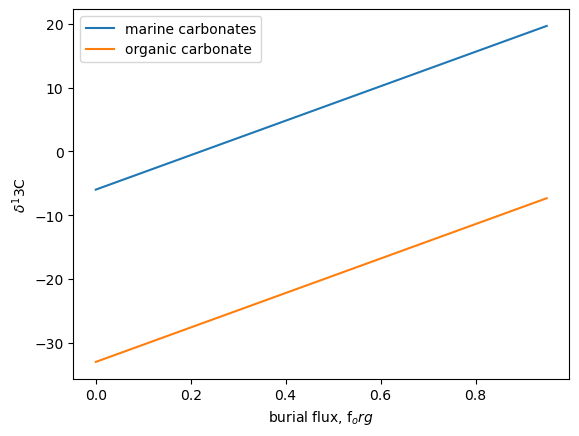

In [58]:
deltaC_w = -6;
DeltaB = -27;
fOrg = np.arange(0,1,0.05);
deltaC_carb = -1*(fOrg*DeltaB-deltaC_w);
deltaC_org = deltaC_carb + DeltaB;

plt.plot(fOrg,deltaC_carb)
plt.plot(fOrg,deltaC_org)
plt.xlabel('burial flux, f$_org$')
plt.ylabel('$\delta^13$C')
plt.legend(['marine carbonates','organic carbonate'])
plt.show()
